In [17]:
library(forecast)
library(ggplot2)

In [25]:
data <- read.csv("extremes.csv", header=TRUE, sep=",")

In [46]:
x<-data[2:dim(data)[1],2]

In [47]:
n=30
# Set forecasting window length (in years)
m=1
# Set start year
start = 1977
origin = 1978
# Set annual sampling rate
f = 12
h = m*f

In [48]:
train_start = index
train_end = train_start+n*f-1

test_start = train_end + 1
test_end = test_start + m*f -1

x.train <- x[train_start:train_end]
x.test <- x[test_start:test_end]

In [49]:
x.ts = ts(x, start=c(origin, 1), freq=f)
x.train <- ts(x.train, start = c(origin, 1), freq=f)
x.test <- ts(x.test, start = c(origin+n, 1), freq=f)

In [50]:
ets(x.train)

ETS(A,N,N) 

Call:
 ets(y = x.train) 

  Smoothing parameters:
    alpha = 0.9969 

  Initial states:
    l = 3.0159 

  sigma:  3.5296

     AIC     AICc      BIC 
3031.042 3031.109 3042.700 

In [51]:
A = forecast(ets(x.train),h=h)$mean
accuracy(A, x.test)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,1.833286,2.041199,1.833294,59.02582,59.02662,0.2902299,1.797391


Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


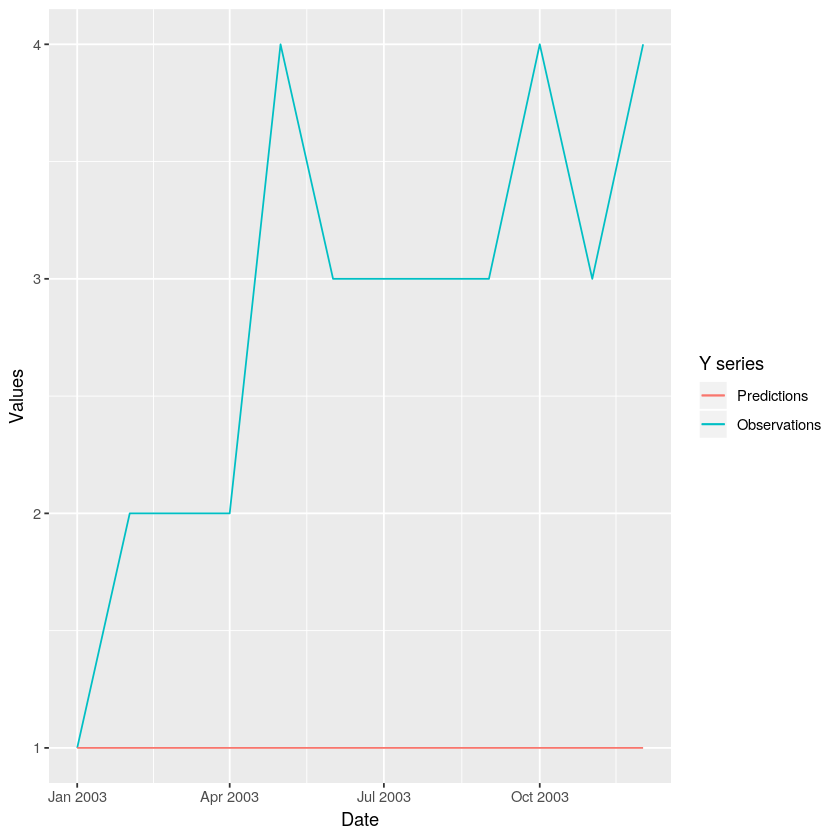

In [52]:
d <- data.frame(
  date = seq(as.Date("2003/1/1"), by = "month", length.out = h),
  x.test,
  A
)

ggplot(d, aes(x=date)) +                    # basic graphical object
  geom_line(aes(y=x.test,colour="red") ) +  # first layer
  geom_line(aes(y=A,colour="blue"))+ ylab("Values")+ xlab("Date")+
  scale_color_discrete(name = "Y series", labels = c("Predictions", "Observations"))

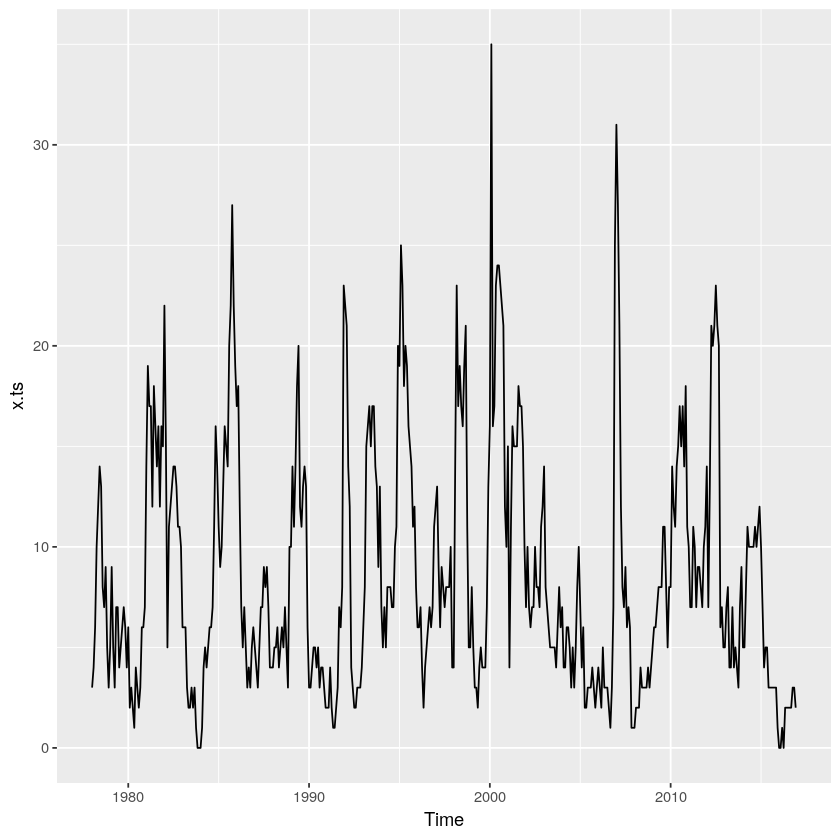

In [41]:
autoplot(x.ts)

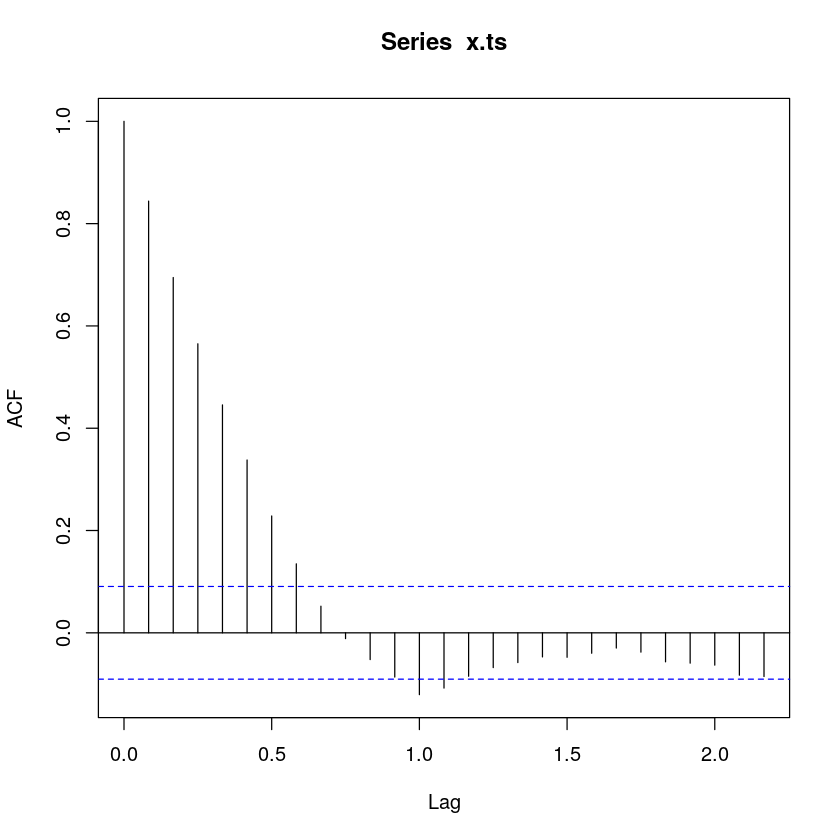

In [44]:
acf(x.ts)

In [ ]:
pa = phase_average(x.train, 12)
x.train.t <- ts(pa$result, start = c(origin, 1), freq=f)

APA = forecast(auto.arima(x.train.t),h=h)$mean
APA = inv_phase_average(APA, f, pa$averages, pa$stds)

accuracy(APA, x.test)